Import Libraries

In [ ]:

import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt
# %matplotlib inline

## Neural Network Training and Testing using Data with 799 features

###Load the Football Data training and testing data from train.csv and test.csv files

In [ ]:
# Load the Football Data
from google.colab import drive
drive.mount('/content/drive/')
data_dir = "/content/drive/My Drive/ML_Data"

train = f"{data_dir}/train.csv"
test = f"{data_dir}/test.csv"
train_df = pd.read_csv(train)
test_df = pd.read_csv(test)



Mounted at /content/drive/


###Set pandas options for maximum column width and maximum rows

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
train_df.head()

,row_id,scout_id,rating_num,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,player_general_var_2,player_general_var_3,player_general_var_4,player_general_var_5,player_positional_raw_var_0,player_positional_raw_var_1,player_positional_raw_var_2,player_positional_raw_var_3,player_defensive_raw_var_4,player_defensive_raw_var_5,player_other_raw_var_6,player_offensive_raw_var_7,player_other_raw_var_8,player_other_raw_var_9,player_other_raw_var_10,player_offensive_raw_var_11,player_other_raw_var_12,player_other_raw_var_13,player_other_raw_var_14,player_positional_raw_var_15,player_positional_raw_var_16,player_positional_raw_var_17,player_other_raw_var_18,player_other_raw_var_19,player_other_raw_var_20,player_positional_raw_var_21,player_positional_raw_var_22,player_positional_raw_var_23,player_other_raw_var_24,player_other_raw_var_25,player_other_raw_var_26,player_other_raw_var_27,player_other_raw_var_28,player_other_raw_var_29,player_other_raw_var_30,player_offensive_raw_var_31,player_offensive_raw_var_32,player_other_raw_var_33,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_36,player_other_raw_var_37,player_other_raw_var_38,player_other_raw_var_39,player_other_raw_var_40,player_other_raw_var_41,player_defensive_raw_var_42,player_defensive_raw_var_43,player_other_raw_var_44,player_other_raw_var_45,player_offensive_raw_var_46,player_other_raw_var_47,player_defensive_raw_var_48,player_offensive_raw_var_49,player_offensive_raw_var_50,player_other_raw_var_51,player_defensive_raw_var_52,player_offensive_raw_var_53,player_other_raw_var_54,player_positional_raw_var_55,player_other_raw_var_56,player_other_raw_var_57,player_other_raw_var_58,player_other_raw_var_59,player_offensive_raw_var_60,player_defensive_raw_var_61,player_defensive_raw_var_62,player_other_raw_var_63,player_other_raw_var_64,player_defensive_raw_var_65,player_defensive_raw_var_66,player_defensive_raw_var_67,player_other_raw_var_68,player_other_raw_var_69,player_defensive_raw_var_70,player_general_raw_var_71,player_general_raw_var_72,player_offensive_raw_var_73,player_defensive_raw_var_74,player_other_raw_var_75,player_other_raw_var_76,player_offensive_raw_var_77,player_general_raw_var_78,player_offensive_raw_var_79,player_other_raw_var_80,player_other_raw_var_81,player_other_raw_var_82,player_other_raw_var_83,player_other_raw_var_84,player_other_raw_var_85,player_positional_raw_var_86,player_offensive_raw_var_87,player_other_raw_var_88,player_other_raw_var_89,player_other_raw_var_90,player_other_raw_var_91,player_defensive_raw_var_92,player_defensive_raw_var_93,player_defensive_raw_var_94,player_defensive_raw_var_95,player_other_raw_var_96,player_defensive_raw_var_97,player_other_raw_var_98,player_other_raw_var_99,player_defensive_raw_var_100,player_other_raw_var_101,player_offensive_raw_var_102,player_other_raw_var_103,player_other_raw_var_104,player_offensive_raw_var_105,player_other_raw_var_106,player_other_raw_var_107,player_other_raw_var_108,player_other_raw_var_109,player_positional_raw_var_110,player_other_raw_var_111,player_other_raw_var_112,player_other_raw_var_113,player_general_raw_var_114,player_offensive_raw_var_115,player_offensive_raw_var_116,player_other_raw_var_117,player_other_raw_var_118,player_other_raw_var_119,player_offensive_raw_var_120,player_other_raw_var_121,player_offensive_raw_var_122,player_other_raw_var_123,player_other_raw_var_124,player_other_raw_var_125,player_offensive_raw_var_126,player_other_raw_var_127,player_other_raw_var_128,player_offensive_raw_var_129,player_offensive_raw_var_130,player_offensive_raw_var_131,player_other_raw_var_132,player_offensive_raw_var_133,player_other_raw_var_134,player_other_raw_var_135,player_other_raw_var_136,player_defensive_raw_var_137,player_offensive_raw_var_138,player_other_raw_var_139,player_other_raw_var_140,player_other_raw_var_141,player_other_raw_var_142,player_general_raw_var_143,player_othe

In [ ]:
test_df.head()

,row_id,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,player_general_var_2,player_general_var_3,player_general_var_4,player_general_var_5,player_positional_raw_var_0,player_positional_raw_var_1,player_positional_raw_var_2,player_positional_raw_var_3,player_defensive_raw_var_4,player_defensive_raw_var_5,player_other_raw_var_6,player_offensive_raw_var_7,player_other_raw_var_8,player_other_raw_var_9,player_other_raw_var_10,player_offensive_raw_var_11,player_other_raw_var_12,player_other_raw_var_13,player_other_raw_var_14,player_positional_raw_var_15,player_positional_raw_var_16,player_positional_raw_var_17,player_other_raw_var_18,player_other_raw_var_19,player_other_raw_var_20,player_positional_raw_var_21,player_positional_raw_var_22,player_positional_raw_var_23,player_other_raw_var_24,player_other_raw_var_25,player_other_raw_var_26,player_other_raw_var_27,player_other_raw_var_28,player_other_raw_var_29,player_other_raw_var_30,player_offensive_raw_var_31,player_offensive_raw_var_32,player_other_raw_var_33,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_36,player_other_raw_var_37,player_other_raw_var_38,player_other_raw_var_39,player_other_raw_var_40,player_other_raw_var_41,player_defensive_raw_var_42,player_defensive_raw_var_43,player_other_raw_var_44,player_other_raw_var_45,player_offensive_raw_var_46,player_other_raw_var_47,player_defensive_raw_var_48,player_offensive_raw_var_49,player_offensive_raw_var_50,player_other_raw_var_51,player_defensive_raw_var_52,player_offensive_raw_var_53,player_other_raw_var_54,player_positional_raw_var_55,player_other_raw_var_56,player_other_raw_var_57,player_other_raw_var_58,player_other_raw_var_59,player_offensive_raw_var_60,player_defensive_raw_var_61,player_defensive_raw_var_62,player_other_raw_var_63,player_other_raw_var_64,player_defensive_raw_var_65,player_defensive_raw_var_66,player_defensive_raw_var_67,player_other_raw_var_68,player_other_raw_var_69,player_defensive_raw_var_70,player_general_raw_var_71,player_general_raw_var_72,player_offensive_raw_var_73,player_defensive_raw_var_74,player_other_raw_var_75,player_other_raw_var_76,player_offensive_raw_var_77,player_general_raw_var_78,player_offensive_raw_var_79,player_other_raw_var_80,player_other_raw_var_81,player_other_raw_var_82,player_other_raw_var_83,player_other_raw_var_84,player_other_raw_var_85,player_positional_raw_var_86,player_offensive_raw_var_87,player_other_raw_var_88,player_other_raw_var_89,player_other_raw_var_90,player_other_raw_var_91,player_defensive_raw_var_92,player_defensive_raw_var_93,player_defensive_raw_var_94,player_defensive_raw_var_95,player_other_raw_var_96,player_defensive_raw_var_97,player_other_raw_var_98,player_other_raw_var_99,player_defensive_raw_var_100,player_other_raw_var_101,player_offensive_raw_var_102,player_other_raw_var_103,player_other_raw_var_104,player_offensive_raw_var_105,player_other_raw_var_106,player_other_raw_var_107,player_other_raw_var_108,player_other_raw_var_109,player_positional_raw_var_110,player_other_raw_var_111,player_other_raw_var_112,player_other_raw_var_113,player_general_raw_var_114,player_offensive_raw_var_115,player_offensive_raw_var_116,player_other_raw_var_117,player_other_raw_var_118,player_other_raw_var_119,player_offensive_raw_var_120,player_other_raw_var_121,player_offensive_raw_var_122,player_other_raw_var_123,player_other_raw_var_124,player_other_raw_var_125,player_offensive_raw_var_126,player_other_raw_var_127,player_other_raw_var_128,player_offensive_raw_var_129,player_offensive_raw_var_130,player_offensive_raw_var_131,player_other_raw_var_132,player_offensive_raw_var_133,player_other_raw_var_134,player_other_raw_var_135,player_other_raw_var_136,player_defensive_raw_var_137,player_offensive_raw_var_138,player_other_raw_var_139,player_other_raw_var_140,player_other_raw_var_141,player_other_raw_var_142,player_general_raw_var_143,player_other_raw_var_1

###Get the column lists from the train and test data

In [ ]:
train_cols = train_df.columns.tolist()
test_cols = test_df.columns.tolist()

# find the column that are in the train data but not in test data
missing_cols = set(train_cols) - set(test_cols)
missing_cols

{'rating_num'}

From this we see that rating ranges from 0 to 10

In [ ]:
train_df['rating_num'].describe()

count    20453.000000
mean         6.887303
std          1.852367
min          0.000000
25%          6.000000
50%          6.500000
75%          8.000000
max         10.000000
Name: rating_num, dtype: float64

In [ ]:
train_df['rating_num'].head()

0    7.0
1    6.5
2    8.5
3    8.0
4    3.5
Name: rating_num, dtype: float64

In [ ]:
train_df.dtypes

row_id                                 int64
scout_id                               int64
rating_num                           float64
winner                                object
team                                  object
competitionId                          int64
player_position_1                    float64
player_position_2                    float64
player_height                        float64
player_weight                        float64
player_general_var_0                 float64
player_general_var_1                   int64
player_general_var_2                 float64
player_general_var_3                 float64
player_general_var_4                 float64
player_general_var_5                 float64
player_positional_raw_var_0          float64
player_positional_raw_var_1          float64
player_positional_raw_var_2          float64
player_positional_raw_var_3          float64
player_defensive_raw_var_4           float64
player_defensive_raw_var_5           float64
player_oth

Find the object features

In [ ]:
cat_cols = []
for col in train_df:
    if train_df[col].dtype =='object' or train_df[col].dtype.name == 'category':
        cat_cols.append(col)

print('object features:', cat_cols)

object features: ['winner', 'team']


In [ ]:
train_df['team'].head()

0    team1
1    team2
2    team1
3    team2
4    team1
Name: team, dtype: object

In [ ]:
train_df['winner'].head(5)

0    winner
1     loser
2     loser
3     loser
4      draw
Name: winner, dtype: object

In [ ]:
train_df.columns

Index(['row_id', 'scout_id', 'rating_num', 'winner', 'team', 'competitionId',
       'player_position_1', 'player_position_2', 'player_height',
       'player_weight',
       ...
       'team2_defensive_derived_var_10', 'team2_offensive_derived_var_11',
       'team2_offensive_derived_var_12', 'team2_offensive_derived_var_13',
       'team2_offensive_derived_var_14', 'team2_defensive_derived_var_15',
       'team2_offensive_derived_var_16', 'team2_defensive_derived_var_17',
       'team2_offensive_derived_var_18', 'team2_offensive_derived_var_19'],
      dtype='object', length=800)

In [ ]:
train_df['winner'] = train_df['winner'].map({'loser': 0, 'winner': 1, 'draw': 2})
train_df['team'] = train_df['team'].map({'team1': 0, 'team2': 1})

In [ ]:

cont_cols = ['row_id', 'scout_id','competitionId','player_position_1','player_position_2','player_height','player_weight','player_general_var_0','player_general_var_1','player_general_var_2','player_general_var_3','player_general_var_4', 'player_general_var_5',
 'player_positional_raw_var_0', 'player_positional_raw_var_1', 'player_positional_raw_var_2', 'player_positional_raw_var_3', 'player_defensive_raw_var_4',
'player_defensive_raw_var_5', 'player_other_raw_var_6', 'player_offensive_raw_var_7', 'player_other_raw_var_8', 'player_other_raw_var_9', 'player_other_raw_var_10', 'player_offensive_raw_var_11', 'player_other_raw_var_12',
'player_other_raw_var_13', 'player_other_raw_var_14', 'player_positional_raw_var_15', 'player_positional_raw_var_16', 'player_positional_raw_var_17', 'player_other_raw_var_18', 'player_other_raw_var_19', 'player_other_raw_var_20',
'player_positional_raw_var_21', 'player_positional_raw_var_22', 'player_positional_raw_var_23', 'player_other_raw_var_24', 'player_other_raw_var_25', 'player_other_raw_var_26', 'player_other_raw_var_27', 'player_other_raw_var_28',
'player_other_raw_var_29', 'player_other_raw_var_30', 'player_offensive_raw_var_31', 'player_offensive_raw_var_32', 'player_other_raw_var_33', 'player_other_raw_var_34', 'player_other_raw_var_35', 'player_other_raw_var_36',
'player_other_raw_var_37', 'player_other_raw_var_38', 'player_other_raw_var_39', 'player_other_raw_var_40', 'player_other_raw_var_41', 'player_defensive_raw_var_42', 'player_defensive_raw_var_43', 'player_other_raw_var_44',
'player_other_raw_var_45', 'player_offensive_raw_var_46', 'player_other_raw_var_47', 'player_defensive_raw_var_48', 'player_offensive_raw_var_49', 'player_offensive_raw_var_50', 'player_other_raw_var_51', 'player_defensive_raw_var_52',
'player_offensive_raw_var_53', 'player_other_raw_var_54', 'player_positional_raw_var_55', 'player_other_raw_var_56', 'player_other_raw_var_57', 'player_other_raw_var_58', 'player_other_raw_var_59',
'player_offensive_raw_var_60', 'player_defensive_raw_var_61', 'player_defensive_raw_var_62', 'player_other_raw_var_63', 'player_other_raw_var_64', 'player_defensive_raw_var_65', 'player_defensive_raw_var_66',
'player_defensive_raw_var_67', 'player_other_raw_var_68', 'player_other_raw_var_69', 'player_defensive_raw_var_70', 'player_general_raw_var_71', 'player_general_raw_var_72', 'player_offensive_raw_var_73',
'player_defensive_raw_var_74', 'player_other_raw_var_75', 'player_other_raw_var_76', 'player_offensive_raw_var_77', 'player_general_raw_var_78', 'player_offensive_raw_var_79', 'player_other_raw_var_80',
'player_other_raw_var_81', 'player_other_raw_var_82', 'player_other_raw_var_83', 'player_other_raw_var_84', 'player_other_raw_var_85', 'player_positional_raw_var_86', 'player_offensive_raw_var_87', 'player_other_raw_var_88',
'player_other_raw_var_89', 'player_other_raw_var_90', 'player_other_raw_var_91', 'player_defensive_raw_var_92', 'player_defensive_raw_var_93', 'player_defensive_raw_var_94', 'player_defensive_raw_var_95', 'player_other_raw_var_96',
'player_defensive_raw_var_97', 'player_other_raw_var_98', 'player_other_raw_var_99', 'player_defensive_raw_var_100', 'player_other_raw_var_101', 'player_offensive_raw_var_102', 'player_other_raw_var_103', 'player_other_raw_var_104',
'player_offensive_raw_var_105', 'player_other_raw_var_106', 'player_other_raw_var_107', 'player_other_raw_var_108', 'player_other_raw_var_109', 'player_positional_raw_var_110',
'player_other_raw_var_111', 'player_other_raw_var_112', 'player_other_raw_var_113', 'player_general_raw_var_114', 'player_offensive_raw_var_115', 'player_offensive_raw_var_116', 'player_other_raw_var_117', 'player_other_raw_var_118',
'player_other_raw_var_119', 'player_offensive_raw_var_120', 'player_other_raw_var_121', 'player_offensive_raw_var_122', 'player_other_raw_var_123', 'player_other_raw_var_124', 'player_other_raw_var_125', 'player_offensive_raw_var_126',
'player_other_raw_var_127', 'player_other_raw_var_128', 'player_offensive_raw_var_129', 'player_offensive_raw_var_130', 'player_offensive_raw_var_131', 'player_other_raw_var_132', 'player_offensive_raw_var_133',
'player_other_raw_var_134', 'player_other_raw_var_135', 'player_other_raw_var_136', 'player_defensive_raw_var_137', 'player_offensive_raw_var_138', 'player_other_raw_var_139', 'player_other_raw_var_140', 'player_other_raw_var_141',
'player_other_raw_var_142', 'player_general_raw_var_143', 'player_other_raw_var_144', 'player_offensive_raw_var_145', 'player_other_raw_var_146', 'player_other_raw_var_147', 'player_offensive_raw_var_148', 'player_other_raw_var_149',
'player_offensive_raw_var_150', 'player_offensive_raw_var_151', 'player_other_raw_var_152', 'player_offensive_raw_var_153', 'player_other_raw_var_154', 'player_offensive_raw_var_155', 'player_offensive_raw_var_156',
'player_other_raw_var_157', 'player_offensive_raw_var_158', 'player_other_raw_var_159', 'player_other_raw_var_160', 'player_defensive_raw_var_161', 'player_general_raw_var_162', 'player_other_raw_var_163', 'player_other_raw_var_164',
'player_defensive_raw_var_165', 'player_defensive_raw_var_166', 'player_other_raw_var_167', 'player_other_raw_var_168','player_other_raw_var_169', 'player_offensive_raw_var_170', 'player_other_raw_var_171', 'player_other_raw_var_172',
'player_other_raw_var_173', 'player_positional_raw_var_174', 'player_other_raw_var_175', 'player_other_raw_var_176', 'player_other_raw_var_177', 'player_other_raw_var_178', 'player_other_raw_var_179', 'player_other_raw_var_180',
'player_other_raw_var_181', 'player_offensive_raw_var_182', 'player_other_raw_var_183', 'player_other_raw_var_184', 'player_positional_raw_var_185', 'player_offensive_raw_var_186', 'player_other_raw_var_187', 'player_other_raw_var_188',
'player_physical_raw_var_189', 'player_physical_raw_var_190', 'player_physical_raw_var_191', 'player_physical_raw_var_192', 'player_physical_raw_var_193', 'player_physical_raw_var_194', 'player_physical_raw_var_195',
'player_physical_raw_var_196', 'player_other_raw_var_197', 'player_physical_raw_var_198',
 'player_positional_ratio_var_0', 'player_positional_ratio_var_1', 'player_defensive_ratio_var_2', 'player_defensive_ratio_var_3', 'player_other_ratio_var_4',
'player_other_ratio_var_5', 'player_other_ratio_var_6', 'player_other_ratio_var_7', 'player_defensive_ratio_var_8', 'player_other_ratio_var_9', 'player_other_ratio_var_10', 'player_other_ratio_var_11', 'player_offensive_ratio_var_12',
'player_offensive_ratio_var_13', 'player_other_ratio_var_14', 'player_other_ratio_var_15', 'player_defensive_ratio_var_16', 'player_defensive_ratio_var_17', 'player_other_ratio_var_18', 'player_offensive_ratio_var_19', 'player_offensive_ratio_var_20',
'player_offensive_ratio_var_21', 'player_positional_ratio_var_22', 'player_other_ratio_var_23', 'player_other_ratio_var_24', 'player_other_ratio_var_25', 'player_other_ratio_var_26', 'player_other_ratio_var_27',
'player_other_ratio_var_28', 'player_defensive_ratio_var_29', 'player_other_ratio_var_30', 'player_other_ratio_var_31','player_other_ratio_var_32', 'player_other_ratio_var_33', 'player_other_ratio_var_34', 'player_offensive_ratio_var_35',
'player_other_ratio_var_36', 'player_other_ratio_var_37', 'player_defensive_ratio_var_38', 'player_defensive_ratio_var_39', 'player_offensive_ratio_var_40', 'player_other_ratio_var_41', 'player_other_ratio_var_42', 'player_other_ratio_var_43',
'player_other_ratio_var_44', 'player_offensive_ratio_var_45','player_positional_ratio_var_46', 'player_positional_ratio_var_47', 'player_other_ratio_var_48', 'player_other_ratio_var_49', 'player_offensive_ratio_var_50', 'player_offensive_ratio_var_51',
'player_offensive_ratio_var_52', 'player_offensive_ratio_var_53', 'player_offensive_ratio_var_54', 'player_other_ratio_var_55', 'player_other_ratio_var_56', 'player_offensive_ratio_var_57', 'player_offensive_ratio_var_58', 'player_offensive_ratio_var_59',
'player_other_ratio_var_60', 'player_other_ratio_var_61', 'player_other_ratio_var_62', 'player_other_ratio_var_63', 'player_offensive_ratio_var_64', 'player_other_ratio_var_65', 'player_other_ratio_var_66', 'player_other_ratio_var_67',
'player_offensive_ratio_var_68', 'player_offensive_ratio_var_69', 'player_offensive_ratio_var_70', 'player_other_ratio_var_71', 'player_offensive_ratio_var_72', 'player_other_ratio_var_73', 'player_other_ratio_var_74', 'player_other_ratio_var_75',
'player_defensive_ratio_var_76', 'player_offensive_ratio_var_77', 'player_offensive_ratio_var_78', 'player_positional_ratio_var_79', 'player_other_ratio_var_80', 'player_defensive_ratio_var_81', 'player_defensive_ratio_var_82',
'player_defensive_ratio_var_83', 'player_defensive_ratio_var_84', 'player_defensive_ratio_var_85', 'player_other_ratio_var_86',

'player_defensive_derived_var_0', 'player_defensive_derived_var_1', 'player_defensive_derived_var_2',
'player_offensive_derived_var_3', 'player_physical_derived_var_4', 'player_physical_derived_var_5', 'player_physical_derived_var_6', 'player_defensive_derived_var_7', 'player_defensive_derived_var_8', 'player_physical_derived_var_9',
'player_physical_derived_var_10', 'player_defensive_derived_var_11', 'player_defensive_derived_var_12', 'player_other_derived_var_13', 'player_positional_derived_var_14', 'player_positional_derived_var_15','player_physical_derived_var_16',
'player_offensive_derived_var_17', 'player_physical_derived_var_18', 'player_defensive_derived_var_19', 'player_other_derived_var_20', 'player_offensive_derived_var_21',
'player_positional_derived_var_22', 'player_physical_derived_var_23', 'player_offensive_derived_var_24', 'player_offensive_derived_var_25', 'player_offensive_derived_var_26', 'player_positional_derived_var_27','player_physical_derived_var_28',
'player_defensive_derived_var_29', 'player_physical_derived_var_30', 'player_defensive_derived_var_31', 'player_defensive_derived_var_32', 'player_defensive_derived_var_33', 'player_physical_derived_var_34', 'player_physical_derived_var_35',
'player_physical_derived_var_36', 'player_defensive_derived_var_37', 'player_offensive_derived_var_38', 'player_physical_derived_var_39',
'player_physical_derived_var_40', 'player_offensive_derived_var_41', 'player_other_derived_var_42', 'player_positional_derived_var_43', 'player_positional_derived_var_44', 'player_physical_derived_var_45',
'player_offensive_derived_var_46', 'player_offensive_derived_var_47', 'player_physical_derived_var_48', 'player_defensive_derived_var_49', 'player_offensive_derived_var_50', 'player_other_derived_var_51',
'player_offensive_derived_var_52', 'player_positional_derived_var_53', 'player_physical_derived_var_54', 'player_offensive_derived_var_55', 'player_offensive_derived_var_56', 'player_positional_derived_var_57',
'player_defensive_derived_var_58', 'player_physical_derived_var_59', 'player_offensive_derived_var_60', 'player_other_derived_var_61', 'player_physical_derived_var_62', 'player_offensive_derived_var_63',
'player_positional_derived_var_64', 'player_defensive_derived_var_65', 'player_defensive_derived_var_66', 'player_defensive_derived_var_67', 'player_offensive_derived_var_68', 'player_physical_derived_var_69',
'player_physical_derived_var_70', 'player_physical_derived_var_71', 'player_defensive_derived_var_72', 'player_offensive_derived_var_73', 'player_physical_derived_var_74', 'player_physical_derived_var_75',
'player_other_derived_var_76', 'player_positional_derived_var_77', 'player_positional_derived_var_78', 'player_physical_derived_var_79', 'player_offensive_derived_var_80', 'player_offensive_derived_var_81',
'player_physical_derived_var_82', 'player_defensive_derived_var_83', 'player_other_derived_var_84', 'player_positional_derived_var_85', 'player_offensive_derived_var_86', 'player_positional_derived_var_87',
'player_physical_derived_var_88', 'player_offensive_derived_var_89', 'player_offensive_derived_var_90', 'player_offensive_derived_var_91', 'player_positional_derived_var_92',
'player_defensive_derived_var_93', 'player_physical_derived_var_94', 'player_defensive_derived_var_95', 'player_other_derived_var_96', 'player_physical_derived_var_97', 'player_defensive_derived_var_98',
'player_offensive_derived_var_99', 'player_positional_derived_var_100','player_defensive_derived_var_101','player_defensive_derived_var_102','player_defensive_derived_var_103','player_offensive_derived_var_104','player_physical_derived_var_105',
'player_physical_derived_var_106','player_physical_derived_var_107','player_defensive_derived_var_108','player_defensive_derived_var_109','player_offensive_derived_var_110','player_physical_derived_var_111','player_physical_derived_var_112',
'player_defensive_derived_var_113','player_defensive_derived_var_114', 'player_other_derived_var_115', 'player_positional_derived_var_116', 'player_positional_derived_var_117','player_physical_derived_var_118', 'player_offensive_derived_var_119',
'player_offensive_derived_var_120', 'player_physical_derived_var_121', 'player_defensive_derived_var_122','player_other_derived_var_123', 'player_offensive_derived_var_124', 'player_positional_derived_var_125', 'player_physical_derived_var_126',
'player_offensive_derived_var_127', 'player_offensive_derived_var_128', 'player_offensive_derived_var_129', 'player_positional_derived_var_130', 'player_physical_derived_var_131', 'player_defensive_derived_var_132', 'player_physical_derived_var_133',
'player_defensive_derived_var_134','player_offensive_derived_var_135', 'player_positional_derived_var_136', 'player_defensive_derived_var_137', 'player_defensive_derived_var_138', 'player_other_derived_var_139', 'player_other_derived_var_140',
'player_other_derived_var_141', 'player_defensive_derived_var_142', 'player_other_derived_var_143', 'player_other_derived_var_144', 'player_other_derived_var_145', 'player_general_derived_var_146', 'player_other_derived_var_147',
'player_general_derived_var_148', 'player_defensive_derived_var_149', 'player_other_derived_var_150', 'player_offensive_derived_var_151', 'player_general_derived_var_152', 'player_offensive_derived_var_153', 'player_offensive_derived_var_154',
'player_offensive_derived_var_155', 'player_general_derived_var_156', 'player_other_derived_var_157', 'player_offensive_derived_var_158', 'player_offensive_derived_var_159', 'player_other_derived_var_160', 'player_offensive_derived_var_161',

'team1_system_id', 'team1_other_raw_var_0', 'team1_offensive_raw_var_1', 'team1_other_raw_var_2', 'team1_defensive_raw_var_3', 'team1_offensive_raw_var_4',
'team1_other_raw_var_5', 'team1_defensive_raw_var_6', 'team1_offensive_raw_var_7', 'team1_other_raw_var_8', 'team1_defensive_raw_var_9', 'team1_offensive_raw_var_10', 'team1_other_raw_var_11', 'team1_defensive_raw_var_12',
'team1_offensive_raw_var_13', 'team1_other_raw_var_14', 'team1_other_raw_var_15', 'team1_other_raw_var_16', 'team1_defensive_raw_var_17', 'team1_offensive_raw_var_18', 'team1_other_raw_var_19', 'team1_other_raw_var_20',
'team1_other_raw_var_21', 'team1_other_raw_var_22', 'team1_other_raw_var_23', 'team1_defensive_raw_var_24', 'team1_other_raw_var_25', 'team1_other_raw_var_26', 'team1_other_raw_var_27', 'team1_other_raw_var_28',
'team1_defensive_raw_var_29', 'team1_other_raw_var_30', 'team1_other_raw_var_31', 'team1_other_raw_var_32', 'team1_other_raw_var_33', 'team1_other_raw_var_34', 'team1_offensive_raw_var_35', 'team1_other_raw_var_36',
'team1_other_raw_var_37', 'team1_other_raw_var_38','team1_other_raw_var_39', 'team1_other_raw_var_40','team1_other_raw_var_41','team1_other_raw_var_42','team1_other_raw_var_43','team1_other_raw_var_44','team1_other_raw_var_45',
'team1_other_raw_var_46','team1_other_raw_var_47','team1_other_raw_var_48','team1_other_raw_var_49','team1_other_raw_var_50','team1_other_raw_var_51','team1_other_raw_var_52','team1_other_raw_var_53', 'team1_other_raw_var_54','team1_other_raw_var_55',
'team1_other_raw_var_56',  'team1_other_raw_var_57',    'team1_other_raw_var_58','team1_other_raw_var_59','team1_other_raw_var_60','team1_other_raw_var_61','team1_other_raw_var_62','team1_other_raw_var_63','team1_other_raw_var_64','team1_other_raw_var_65',
'team1_other_raw_var_66','team1_other_raw_var_67','team1_defensive_raw_var_68','team1_other_raw_var_69','team1_other_raw_var_70','team1_defensive_raw_var_71','team1_other_raw_var_72','team1_other_raw_var_73','team1_other_raw_var_74','team1_other_raw_var_75',
'team1_other_raw_var_76',
'team1_offensive_raw_var_77','team1_other_raw_var_78', 'team1_other_raw_var_79', 'team1_other_raw_var_80', 'team1_other_raw_var_81', 'team1_other_raw_var_82', 'team1_other_raw_var_83', 'team1_other_raw_var_84', 'team1_other_raw_var_85',
'team1_offensive_raw_var_86', 'team1_other_raw_var_87', 'team1_other_raw_var_88', 'team1_other_raw_var_89', 'team1_other_raw_var_90', 'team1_offensive_raw_var_91', 'team1_other_raw_var_92', 'team1_other_raw_var_93','team1_other_ratio_var_0',
'team1_other_ratio_var_1', 'team1_defensive_ratio_var_2', 'team1_other_ratio_var_3', 'team1_other_ratio_var_4', 'team1_defensive_ratio_var_5', 'team1_offensive_ratio_var_6', 'team1_other_ratio_var_7',
'team1_other_ratio_var_8', 'team1_offensive_ratio_var_9', 'team1_other_ratio_var_10', 'team1_other_ratio_var_11', 'team1_other_ratio_var_12', 'team1_other_ratio_var_13', 'team1_other_ratio_var_14', 'team1_other_ratio_var_15',
'team1_other_ratio_var_16', 'team1_other_ratio_var_17', 'team1_other_ratio_var_18', 'team1_other_ratio_var_19', 'team1_other_ratio_var_20', 'team1_other_ratio_var_21', 'team1_other_ratio_var_22', 'team1_other_ratio_var_23',
'team1_offensive_ratio_var_24', 'team1_other_ratio_var_25', 'team1_other_ratio_var_26', 'team1_other_ratio_var_27', 'team1_other_ratio_var_28', 'team1_other_ratio_var_29', 'team1_offensive_ratio_var_30', 'team1_other_ratio_var_31',
'team1_other_ratio_var_32', 'team1_other_ratio_var_33', 'team1_other_ratio_var_34', 'team1_other_ratio_var_35', 'team1_other_ratio_var_36', 'team1_other_ratio_var_37', 'team1_other_ratio_var_38', 'team1_other_ratio_var_39',
'team1_other_ratio_var_40', 'team1_other_ratio_var_41', 'team1_other_ratio_var_42', 'team1_other_ratio_var_43', 'team1_other_ratio_var_44', 'team1_other_ratio_var_45', 'team1_other_ratio_var_46', 'team1_other_ratio_var_47',
'team1_offensive_ratio_var_48', 'team1_other_ratio_var_49', 'team1_other_ratio_var_50', 'team1_other_ratio_var_51', 'team1_other_ratio_var_52', 'team1_offensive_derived_var_0', 'team1_defensive_derived_var_1',
'team1_defensive_derived_var_2', 'team1_defensive_derived_var_3', 'team1_offensive_derived_var_4', 'team1_offensive_derived_var_5', 'team1_defensive_derived_var_6', 'team1_offensive_derived_var_7', 'team1_defensive_derived_var_8',
'team1_defensive_derived_var_9', 'team1_defensive_derived_var_10', 'team1_offensive_derived_var_11','team1_offensive_derived_var_12', 'team1_offensive_derived_var_13', 'team1_offensive_derived_var_14', 'team1_defensive_derived_var_15',
'team1_offensive_derived_var_16', 'team1_defensive_derived_var_17', 'team1_offensive_derived_var_18', 'team1_offensive_derived_var_19','team2_system_id', 'team2_other_raw_var_0', 'team2_offensive_raw_var_1', 'team2_other_raw_var_2', 'team2_defensive_raw_var_3', 'team2_offensive_raw_var_4', 'team2_other_raw_var_5',
'team2_defensive_raw_var_6', 'team2_offensive_raw_var_7', 'team2_other_raw_var_8', 'team2_defensive_raw_var_9', 'team2_offensive_raw_var_10', 'team2_other_raw_var_11', 'team2_defensive_raw_var_12', 'team2_offensive_raw_var_13', 'team2_other_raw_var_14',
'team2_other_raw_var_15', 'team2_other_raw_var_16', 'team2_defensive_raw_var_17', 'team2_offensive_raw_var_18', 'team2_other_raw_var_19', 'team2_other_raw_var_20', 'team2_other_raw_var_21',
'team2_other_raw_var_22', 'team2_other_raw_var_23', 'team2_defensive_raw_var_24', 'team2_other_raw_var_25', 'team2_other_raw_var_26', 'team2_other_raw_var_27', 'team2_other_raw_var_28', 'team2_defensive_raw_var_29',
'team2_other_raw_var_30', 'team2_other_raw_var_31', 'team2_other_raw_var_32', 'team2_other_raw_var_33', 'team2_other_raw_var_34', 'team2_offensive_raw_var_35', 'team2_other_raw_var_36', 'team2_other_raw_var_37',
'team2_other_raw_var_38', 'team2_other_raw_var_39', 'team2_other_raw_var_40', 'team2_other_raw_var_41', 'team2_other_raw_var_42', 'team2_other_raw_var_43', 'team2_other_raw_var_44', 'team2_other_raw_var_45', 'team2_other_raw_var_46',
'team2_other_raw_var_47', 'team2_other_raw_var_48', 'team2_other_raw_var_49', 'team2_other_raw_var_50', 'team2_other_raw_var_51', 'team2_other_raw_var_52', 'team2_other_raw_var_53', 'team2_other_raw_var_54', 'team2_other_raw_var_55',
'team2_other_raw_var_56', 'team2_other_raw_var_57', 'team2_other_raw_var_58', 'team2_other_raw_var_59', 'team2_other_raw_var_60', 'team2_other_raw_var_61', 'team2_other_raw_var_62', 'team2_other_raw_var_63', 'team2_other_raw_var_64',
'team2_other_raw_var_65', 'team2_other_raw_var_66', 'team2_other_raw_var_67', 'team2_defensive_raw_var_68', 'team2_other_raw_var_69', 'team2_other_raw_var_70', 'team2_defensive_raw_var_71', 'team2_other_raw_var_72',
'team2_other_raw_var_73', 'team2_other_raw_var_74', 'team2_other_raw_var_75', 'team2_other_raw_var_76', 'team2_offensive_raw_var_77', 'team2_other_raw_var_78', 'team2_other_raw_var_79', 'team2_other_raw_var_80',
'team2_other_raw_var_81','team2_other_raw_var_82','team2_other_raw_var_83','team2_other_raw_var_84','team2_other_raw_var_85','team2_offensive_raw_var_86','team2_other_raw_var_87','team2_other_raw_var_88','team2_other_raw_var_89',
'team2_other_raw_var_90','team2_offensive_raw_var_91','team2_other_raw_var_92','team2_other_raw_var_93',
'team2_other_ratio_var_0','team2_other_ratio_var_1','team2_defensive_ratio_var_2','team2_other_ratio_var_3','team2_other_ratio_var_4','team2_defensive_ratio_var_5','team2_offensive_ratio_var_6','team2_other_ratio_var_7','team2_other_ratio_var_8',
'team2_offensive_ratio_var_9','team2_other_ratio_var_10','team2_other_ratio_var_11','team2_other_ratio_var_12', 'team2_other_ratio_var_13', 'team2_other_ratio_var_14', 'team2_other_ratio_var_15', 'team2_other_ratio_var_16', 'team2_other_ratio_var_17',
'team2_other_ratio_var_18', 'team2_other_ratio_var_19', 'team2_other_ratio_var_20', 'team2_other_ratio_var_21', 'team2_other_ratio_var_22', 'team2_other_ratio_var_23', 'team2_offensive_ratio_var_24',
'team2_other_ratio_var_25', 'team2_other_ratio_var_26', 'team2_other_ratio_var_27', 'team2_other_ratio_var_28', 'team2_other_ratio_var_29', 'team2_offensive_ratio_var_30', 'team2_other_ratio_var_31', 'team2_other_ratio_var_32',
 'team2_other_ratio_var_33', 'team2_other_ratio_var_34', 'team2_other_ratio_var_35', 'team2_other_ratio_var_36', 'team2_other_ratio_var_37', 'team2_other_ratio_var_38', 'team2_other_ratio_var_39', 'team2_other_ratio_var_40',
'team2_other_ratio_var_41', 'team2_other_ratio_var_42', 'team2_other_ratio_var_43', 'team2_other_ratio_var_44', 'team2_other_ratio_var_45', 'team2_other_ratio_var_46', 'team2_other_ratio_var_47', 'team2_offensive_ratio_var_48',
'team2_other_ratio_var_49', 'team2_other_ratio_var_50', 'team2_other_ratio_var_51', 'team2_other_ratio_var_52',  'team2_offensive_derived_var_0', 'team2_defensive_derived_var_1', 'team2_defensive_derived_var_2',
 'team2_defensive_derived_var_3', 'team2_offensive_derived_var_4', 'team2_offensive_derived_var_5', 'team2_defensive_derived_var_6', 'team2_offensive_derived_var_7', 'team2_defensive_derived_var_8', 'team2_defensive_derived_var_9',
'team2_defensive_derived_var_10', 'team2_offensive_derived_var_11', 'team2_offensive_derived_var_12', 'team2_offensive_derived_var_13', 'team2_offensive_derived_var_14', 'team2_defensive_derived_var_15', 'team2_offensive_derived_var_16',
 'team2_defensive_derived_var_17', 'team2_offensive_derived_var_18', 'team2_offensive_derived_var_19'  ]

obj_cols = ['winner','team']
y_col =    ['rating_num']

in_features = len(cont_cols) + len(obj_cols)


###Convert continous variables to a tensor

In [ ]:

conts = np.stack([train_df[col].values for col in cont_cols],1)
conts = torch.tensor(conts,dtype= torch.float)
conts[:5]

tensor([[ 1.0000, 13.0000,  8.0000,  ...,  0.2890,  0.3107,  0.2049],
        [ 3.0000, 16.0000,  8.0000,  ...,  0.3350,  0.3801,  0.2954],
        [ 4.0000,  4.0000,  5.0000,  ...,  0.4143,  0.5708,  0.4375],
        [ 5.0000, 13.0000,  4.0000,  ...,  0.4230,  0.3308,  0.2356],
        [ 7.0000, 11.0000,  5.0000,  ...,  0.4484,  0.4449,  0.3125]])

###Convert the output ranks to a tensor

In [ ]:
y_out = torch.tensor(train_df[y_col].values, dtype= torch.float).reshape(-1,1)
y_out[:5]

tensor([[7.0000],
        [6.5000],
        [8.5000],
        [8.0000],
        [3.5000]])

###Convert object data types to tensors

In [ ]:

objs = np.stack([train_df[col].values.tolist() for col in obj_cols],1)
objs = torch.tensor(objs, dtype= torch.float)

In [ ]:
objs[:5]

tensor([[1., 0.],
        [0., 1.],
        [0., 0.],
        [0., 1.],
        [2., 0.]])

###Cascading the continous variables tensors and object variables tensors:

In [ ]:
conts_total =torch.cat((conts,objs),-1)
print(conts_total.type())
print(conts_total.shape)


torch.FloatTensor
torch.Size([20453, 799])


###Creating the ANN Regression Model

In [ ]:
class Model(nn.Module):
    def __init__(self,in_features, h1, h2, h3, h4, h5, h6, h7, h8, out_features):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.fc4 = nn.Linear(h3, h4)
        self.fc5 = nn.Linear(h4, h5)
        self.fc6 = nn.Linear(h5, h6)
        self.fc7 = nn.Linear(h6, h7)
        self.fc8 = nn.Linear(h7, h8)
        self.out = nn.Linear(h8,out_features)


    def forward(self,x):

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))

        x = self.out(x)


        return x

In [ ]:
conts_total[:5]

tensor([[ 1.0000, 13.0000,  8.0000,  ...,  0.2049,  1.0000,  0.0000],
        [ 3.0000, 16.0000,  8.0000,  ...,  0.2954,  0.0000,  1.0000],
        [ 4.0000,  4.0000,  5.0000,  ...,  0.4375,  0.0000,  0.0000],
        [ 5.0000, 13.0000,  4.0000,  ...,  0.2356,  0.0000,  1.0000],
        [ 7.0000, 11.0000,  5.0000,  ...,  0.3125,  2.0000,  0.0000]])

In [ ]:
conts_total.shape

torch.Size([20453, 799])

Checking if there is any nan in conts_total

In [ ]:
torch.isnan(conts_total).any()

tensor(True)

Putting zero in place of nan

In [ ]:
mask = torch.isnan(conts_total)
conts_total = torch.where(mask, torch.tensor(0.0),conts_total)

In [ ]:
conts_total.min()

tensor(0.)

In [ ]:
conts_total.max()

tensor(29227.)

Normalizing the Input data given to model

In [ ]:
model_input_normalized = (conts_total-conts_total.min())/(conts_total.max()-conts_total.min())
model_input_normalized[:5]

tensor([[3.4215e-05, 4.4479e-04, 2.7372e-04,  ..., 7.0115e-06, 3.4215e-05,
         0.0000e+00],
        [1.0264e-04, 5.4744e-04, 2.7372e-04,  ..., 1.0107e-05, 0.0000e+00,
         3.4215e-05],
        [1.3686e-04, 1.3686e-04, 1.7107e-04,  ..., 1.4969e-05, 0.0000e+00,
         0.0000e+00],
        [1.7107e-04, 4.4479e-04, 1.3686e-04,  ..., 8.0596e-06, 0.0000e+00,
         3.4215e-05],
        [2.3950e-04, 3.7636e-04, 1.7107e-04,  ..., 1.0692e-05, 6.8430e-05,
         0.0000e+00]])

Checking if there is nan in y_out

In [ ]:
torch.isnan(y_out).any()

tensor(False)

Dividing the input data for training and Testing.

In [ ]:
train_size = int (0.7 * len(model_input_normalized))
train_model_input_normalized = model_input_normalized[:train_size]
test_model_input_normalized = model_input_normalized[train_size:]
print("Training set shape:", train_model_input_normalized.shape)
print("Training set shape:",test_model_input_normalized.shape)

Training set shape: torch.Size([14317, 799])
Training set shape: torch.Size([6136, 799])


Dividing the Output data for training and Testing in 7:3.

In [ ]:

train_label_size = int(0.7*len(y_out))
train_y_out = y_out[:train_label_size]
test_y_out = y_out[train_label_size:]
print(train_y_out.shape)
print(test_y_out.shape)

torch.Size([14317, 1])
torch.Size([6136, 1])


Training the Model

In [ ]:

import time
start_time = time.time()

torch.manual_seed(32)
epochs = 800
losses = []

model = Model(in_features, h1= 800, h2= 800, h3= 800, h4= 800, h5= 800, h6= 800, h7=800, h8= 800, out_features = 1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr =0.0001)

for i in range(epochs):
    optimizer.zero_grad()  # Clear the gradients from the previous iteration

    output = model(train_model_input_normalized)  # Forward pass
    loss = criterion(output, train_y_out)  # Calculate the loss
    losses.append(loss.item())
    loss.backward()  # Backward pass
    optimizer.step()  # Update the weights

    if i % 10 == 0:
        print(f"Epoch {i}, Loss {loss.item():.4f}")

print(f"\nDuration {time.time() - start_time:.0f} seconds") # print the time elapsed

Epoch 0, Loss 54.1027
Epoch 10, Loss 52.6074
Epoch 20, Loss 50.1547
Epoch 30, Loss 39.6799
Epoch 40, Loss 3.7427
Epoch 50, Loss 4.4405
Epoch 60, Loss 3.9059
Epoch 70, Loss 3.8249
Epoch 80, Loss 3.8148
Epoch 90, Loss 3.7592
Epoch 100, Loss 3.7338
Epoch 110, Loss 3.7209
Epoch 120, Loss 3.7147
Epoch 130, Loss 3.7111
Epoch 140, Loss 3.7085
Epoch 150, Loss 3.7063
Epoch 160, Loss 3.7044
Epoch 170, Loss 3.7026
Epoch 180, Loss 3.7011
Epoch 190, Loss 3.6998
Epoch 200, Loss 3.6987
Epoch 210, Loss 3.6977
Epoch 220, Loss 3.6970
Epoch 230, Loss 3.6964
Epoch 240, Loss 3.6959
Epoch 250, Loss 3.6956
Epoch 260, Loss 3.6953
Epoch 270, Loss 3.6952
Epoch 280, Loss 3.6950
Epoch 290, Loss 3.6949
Epoch 300, Loss 3.6948
Epoch 310, Loss 3.6948
Epoch 320, Loss 3.6947
Epoch 330, Loss 3.6947
Epoch 340, Loss 3.6946
Epoch 350, Loss 3.6946
Epoch 360, Loss 3.6946
Epoch 370, Loss 3.6945
Epoch 380, Loss 3.6945
Epoch 390, Loss 3.6945
Epoch 400, Loss 3.6944
Epoch 410, Loss 3.6944
Epoch 420, Loss 3.6944
Epoch 430, Loss 3.

Plotting the losss function

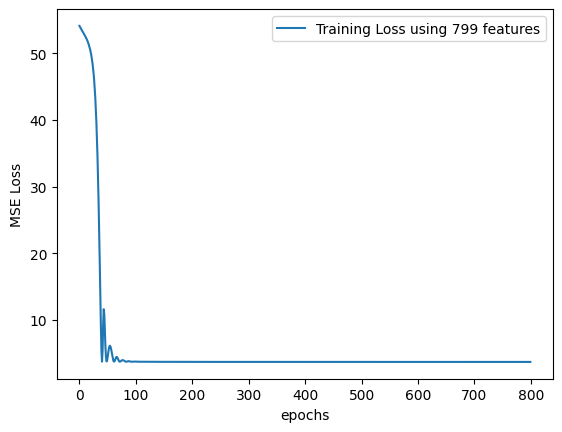

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('MSE Loss')
plt.xlabel('epochs')
plt.legend(['Training Loss using 799 features'])


Testing the Model to evaluate its performance

In [ ]:
with torch.no_grad():
  output = model(test_model_input_normalized)  # Forward pass

  loss = criterion(output,test_y_out)  # Calculate the loss
  rmse_loss = torch.sqrt(loss)

print(f'RMSE:{rmse_loss:.8f}')



RMSE:1.76142263


This means the predicted ranks are within (+-) 1.6 of the actual value



In [ ]:
for i in range(10):
  diff = np.abs(output[i].item() - test_y_out[i].item())
  print(f'PREDICTED: {output[i].item():8.2f}    TRUE: {test_y_out[i].item():8.2f}   DIFF:{diff: 8.2f}')

PREDICTED:     7.08    TRUE:     6.50   DIFF:    0.58
PREDICTED:     7.08    TRUE:     5.00   DIFF:    2.08
PREDICTED:     7.08    TRUE:     6.50   DIFF:    0.58
PREDICTED:     7.08    TRUE:     7.50   DIFF:    0.42
PREDICTED:     7.08    TRUE:     7.50   DIFF:    0.42
PREDICTED:     7.08    TRUE:     5.00   DIFF:    2.08
PREDICTED:     7.08    TRUE:     5.00   DIFF:    2.08
PREDICTED:     7.08    TRUE:     6.00   DIFF:    1.08
PREDICTED:     7.08    TRUE:     5.00   DIFF:    2.08
PREDICTED:     7.08    TRUE:     7.50   DIFF:    0.42


Create Scatter plot between predicted and True values and also showing the absolute errors.

Text(0.5, 1.0, 'predicted vs True values using 799 features')

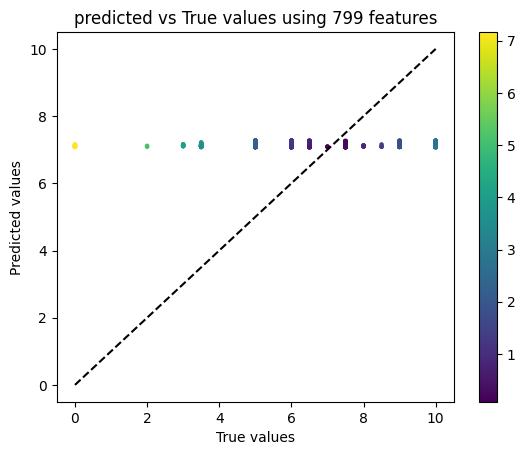

In [ ]:
abolute_diff = np.abs(output - test_y_out).reshape(-1)
plt.scatter(test_y_out.detach().numpy(), output.detach().numpy(),c=abolute_diff, cmap= 'viridis', s =5)
plt.colorbar()
plt.plot([0,10],[0,10], linestyle='--', color='k')    # Plot a diagonal line for reference
plt.xlabel("True values")
plt.ylabel('Predicted values')
plt.title('predicted vs True values using 799 features')


Creating the density plot of actual and predicted values.

Text(0.5, 1.0, 'Density plot of actual and predicted values using 799 features')

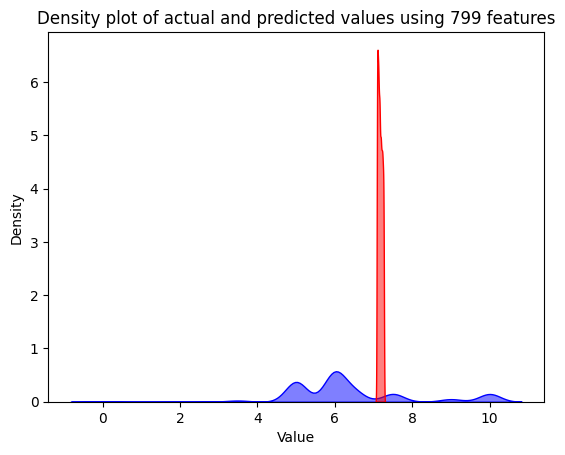

In [ ]:
import seaborn as sns
# Create a dataframe with the actual data and predictions
df = pd.DataFrame({'Actual': test_y_out.detach().numpy().flatten(),
                   'Predicted': output.detach().numpy().flatten()})

# Create a density plot of the actual data
sns.kdeplot(data=df, x='Actual', fill=True, alpha=0.5, color='blue', label='Actual')

# Create a density plot of the predicted data
sns.kdeplot(data=df, x='Predicted', fill=True, alpha=0.5, color='red', label='Predicted')

# Set the plot labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density plot of actual and predicted values using 799 features')

# Add a legend






Save the model after the training it.

In [ ]:

if len(losses) == epochs:
    torch.save(model.state_dict(), 'Project_Model_799_features.pt')
else:
    print('Model has not been trained. Consider loading a trained model instead.')

## Neural Network Training and Testing using Data with 50 features

In [ ]:
train_df = pd.read_csv(train)
test_df = pd.read_csv(test)
test_init = test_df[['row_id']].copy()

In [ ]:
df = train_df
df = df.drop(['rating_num','row_id'], axis =1)
for column in df.select_dtypes('float64').columns.to_list():
    if df[column].isnull().sum()/len(df) == 1:
        df = df.drop(column,axis=1)

for column in df.select_dtypes('float64').columns.to_list():
    if df[column].isnull().sum() != 0:
        df[column] = df[column].fillna(df[column].mean())

df

,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,...,team2_defensive_derived_var_10,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19
0,13,winner,team1,8,7.000000,7.000000,0.317073,0.48,0.0,0,...,0.193658,0.131548,0.097131,0.600944,0.338892,0.347980,0.034157,0.288962,0.310727,0.204925
1,16,loser,team2,8,3.000000,9.000000,0.463415,0.42,0.0,0,...,0.190500,0.173697,0.272801,0.605659,0.526761,0.468976,0.054034,0.334962,0.380073,0.295392
2,4,loser,team1,5,11.000000,11.000000,0.682927,0.44,0.0,0,...,0.312314,0.250756,0.212631,0.558833,0.686523,0.441749,0.219441,0.414288,0.570757,0.437500
3,13,loser,team2,4,17.000000,17.000000,0.682927,0.58,0.0,0,...,0.282556,0.155969,0.206503,0.533002,0.373959,0.527733,0.095201,0.423040,0.330754,0.235558
4,11,draw,team1,5,10.000000,10.000000,0.731707,0.70,0.0,0,...,0.450453,0.199050,0.134002,0.688773,0.681724,0.733625,0.128719,0.448360,0.444946,0.312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20448,14,draw,team2,14,7.609481,8.012612,0.439024,0.26,0.0,0,...,0.350022,0.179766,0.253738,0.582760,0.480930,0.497442,0.113251,0.424523,0.420103,0.333038
20449,3,winner,team2,11,4.000000,4.000000,0.390244,0.32,0.0,0,...,0.362193,0.240326,0.369752,0.438649,0.381099,0.264074,0.171927,0.422975,0.588501,0.534694
20450,4,loser,team1,7,5.000000,5.000000,0.268293,0.30,0.0,0,...,0.341322,0.248870,0.240096,0.515025,0.694587,0.869000,0.296820,0.511550,0.548315,0.385927
20451,13,loser,team1,8,5.000000,5.000000,0.463415,0.46,0.0,0,...,0.215831,0.190395,0.207007,0.631279,0.330606,0.322158,0.108018,0.333229,0.349177,0.458685


### Quantile Tranformation

For column with prefix as Derived and Ratio we normalized them by using Quantile Transformer.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html


In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('player_general_var')]
for column in l1:
    qt1 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt1.fit_transform(df[column].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('player_general_derived_var')]
for column in l1:
    qt2 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt2.fit_transform(df[column].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('player_defensive_ratio_var')]
for column in l1:
    qt3 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt3.fit_transform(df[column].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('player_defensive_derived_var')]
for column in l1:
    qt4 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt4.fit_transform(df[column].values.reshape(-1,1))


In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('player_offensive_derived_var')]
for column in l1:
    qt5 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt5.fit_transform(df[column].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('player_offensive_ratio_var')]
for column in l1:
    qt5 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt5.fit_transform(df[column].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('team1_offensive_ratio_var')]
for column in l1:
    qt6 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt6.fit_transform(df[column].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('team1_offensive_derived_var')]
for column in l1:
    qt7 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt7.fit_transform(df[column].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('team2_offensive_ratio_var')]
for column in l1:
    qt8 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt8.fit_transform(df[column].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('team2_offensive_derived_var')]
for column in l1:
    qt9 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt9.fit_transform(df[column].values.reshape(-1,1))

In [ ]:
from sklearn.preprocessing import QuantileTransformer
l1 = [x for x in df.columns.to_list() if x.startswith('player_physical_derived_var')]
for column in l1:
    qt9 = QuantileTransformer(output_distribution = 'normal')
    df[column] = qt9.fit_transform(df[column].values.reshape(-1,1))

###Label Encoder
Columns with multimodal kind of distribution are converted to object types and then Label Encoded

In [ ]:
l1 = [x for x in df.columns.to_list() if x.startswith('player_general_raw_var')]
for column in l1:
    df[column] = df[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l1:
    lb = LabelEncoder()
    df[column] = lb.fit_transform(df[column].values.reshape(-1,1))



l2 = [x for x in df.columns.to_list() if x.startswith('player_defensive_raw_var')]
for column in l2:
    df[column] = df[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l2:
    lb = LabelEncoder()
    df[column] = lb.fit_transform(df[column].values.reshape(-1,1))


l3 = [x for x in df.columns.to_list() if x.startswith('player_offensive_raw_var')]
for column in l3:
    df[column] = df[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l3:
    lb = LabelEncoder()
    df[column] = lb.fit_transform(df[column].values.reshape(-1,1))


l4 = [x for x in df.columns.to_list() if x.startswith('team1_offensive_raw_var')]
for column in l4:
    df[column] = df[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l4:
    lb = LabelEncoder()
    df[column] = lb.fit_transform(df[column].values.reshape(-1,1))


l5 = [x for x in df.columns.to_list() if x.startswith('team1_defensive_raw_var')]
for column in l5:
    df[column] = df[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l5:
    lb = LabelEncoder()
    df[column] = lb.fit_transform(df[column].values.reshape(-1,1))


l6 = [x for x in df.columns.to_list() if x.startswith('team2_offensive_raw_var')]
for column in l6:
    df[column] = df[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l6:
    lb = LabelEncoder()
    df[column] = lb.fit_transform(df[column].values.reshape(-1,1))


l7 = [x for x in df.columns.to_list() if x.startswith('team2_defensive_raw_var')]
for column in l7:
    df[column] = df[column].astype('object')
from sklearn.preprocessing import LabelEncoder
for column in l7:
    lb = LabelEncoder()
    df[column] = lb.fit_transform(df[column].values.reshape(-1,1))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in df.select_dtypes('object').columns.to_list():
    lb = LabelEncoder()
    df[column] = lb.fit_transform(df[column].values.reshape(-1,1))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
cat_feature = ['scout_id','winner','team','team1_system_id','team2_system_id','competitionId','player_position_1','player_position_2']
cat_feature = cat_feature+l1+l2+l3+l4+l5+l6+l7
for column in cat_feature:
    df[column] = df[column].astype('int64')

In [ ]:
x = df
y = train_df['rating_num']
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=101)

In [ ]:
print(type(x_train))
print(x_train.shape)
print(type(x_test))
print(x_test.shape)
print(type(y_train))
print(y_train.shape)
print(type(y_test))
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
(16362, 772)
<class 'pandas.core.frame.DataFrame'>
(4091, 772)
<class 'pandas.core.series.Series'>
(16362,)
<class 'pandas.core.series.Series'>
(4091,)


#Feature Importance
####We use 3 models to find top 50 features that contribute the most towards our target variable. We have used the features outputted by CatBoost as the best Score for testing data. Also the features outputted made sense with our domain knowledge.
    1)XGBoost
    2)LightGBM
    3)CatBoost

### XGBOOST

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb = XGBRegressor(n_estimators = 100)
xgb.fit(x_train,y_train)

preds_valid = xgb.predict(x_test)

print('Training Score',r2_score(y_train,xgb.predict(x_train)))
print()
print('Test Score',r2_score(y_test,xgb.predict(x_test)))

Training Score 0.8335946004348841

Test Score 0.2929798609413282


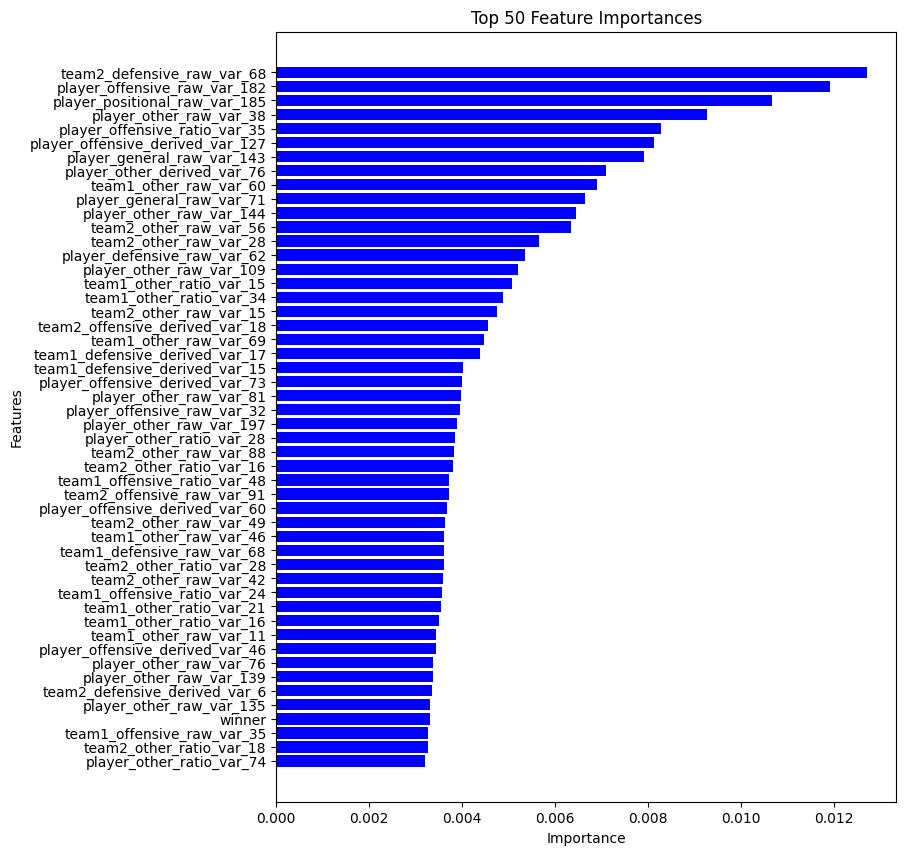

In [ ]:
import matplotlib.pyplot as plt

importance = xgb.feature_importances_
indices = np.argsort(importance)[::-1][:50]
features = x_train.columns[indices]
importance = importance[indices]

plt.figure(figsize=(8, 10))
plt.barh(features, importance, color='blue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 50 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

### LIGHTGBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import r2_score

lgbr = lgb.LGBMRegressor(n_estimators = 170)
lgbr.fit(x_train,y_train)

preds_valid = lgbr.predict(x_test)

print('Training Score',r2_score(y_train,lgbr.predict(x_train)))
print()
print('Test Score',r2_score(y_test,lgbr.predict(x_test)))

Training Score 0.6869194505943308

Test Score 0.31053713825307927


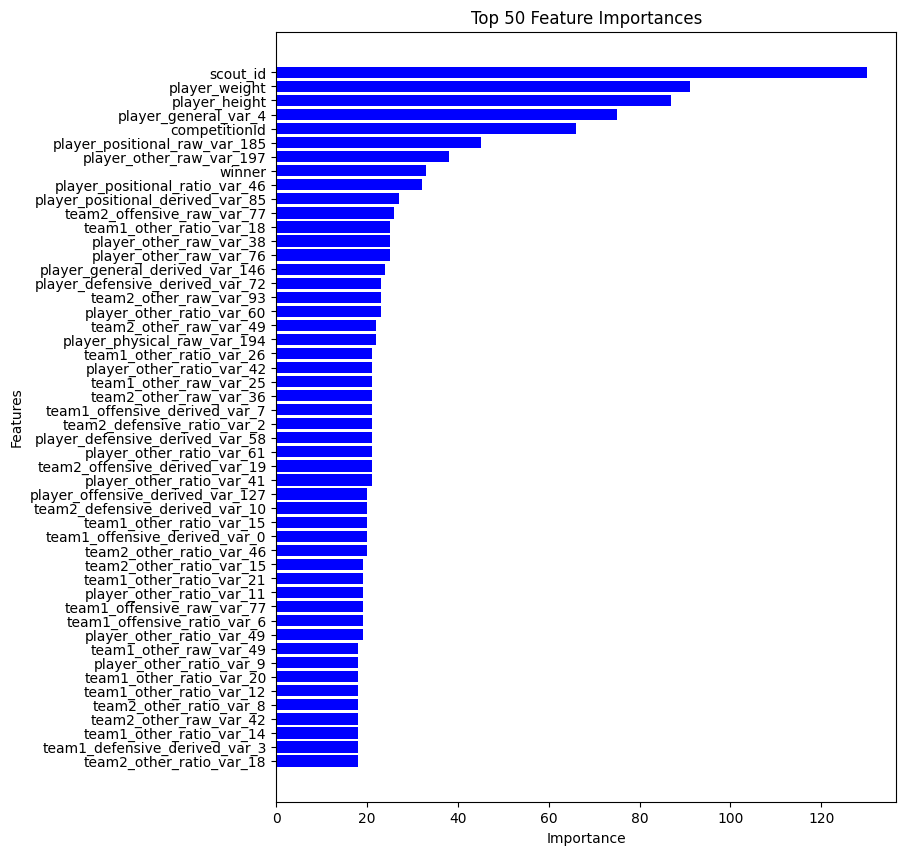

In [ ]:
importance = lgbr.feature_importances_
indices = np.argsort(importance)[::-1][:50]
features = x_train.columns[indices]
importance = importance[indices]

plt.figure(figsize=(8, 10))
plt.barh(features, importance, color='blue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 50 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

### CATBOOST

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.8 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cbr = CatBoostRegressor(verbose = False , eval_metric = 'R2',cat_features=cat_feature)
cbr.fit(x_train,y_train)

preds_valid = cbr.predict(x_test)

print('Training Score',r2_score(y_train,cbr.predict(x_train)))
print()
print('Test Score',r2_score(y_test,cbr.predict(x_test)))

Training Score 0.7285735490827514

Test Score 0.36921985480059316


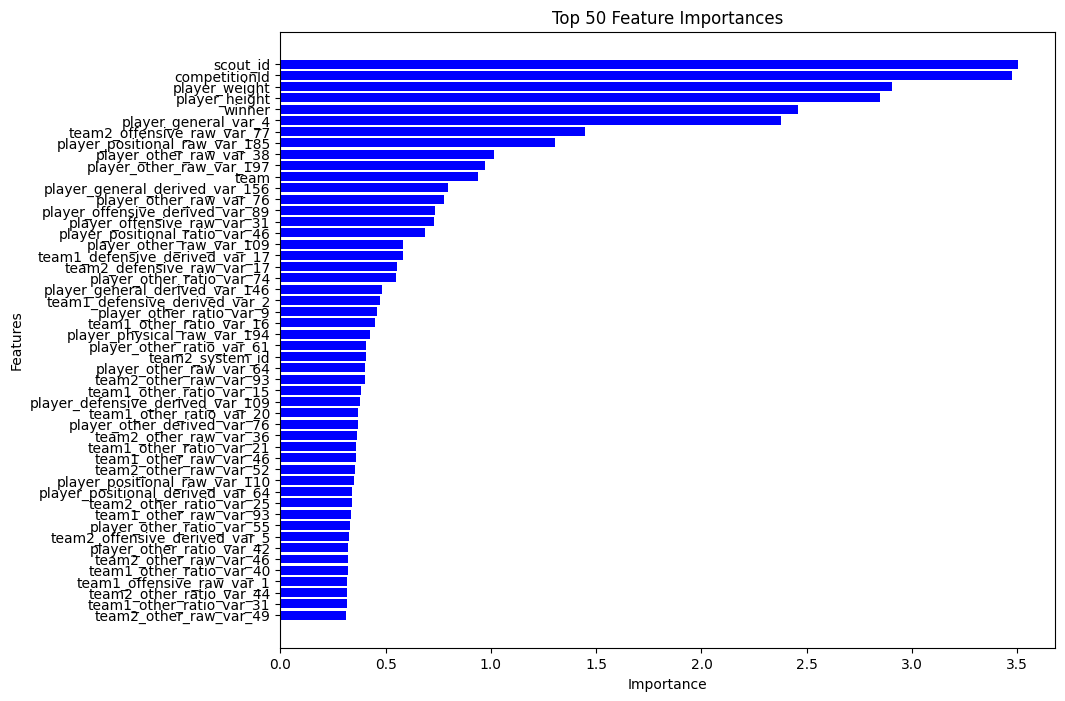

In [ ]:
importance = cbr.get_feature_importance()
indices = np.argsort(importance)[::-1][:50]
features = x_train.columns[indices]
importance = importance[indices]

plt.figure(figsize=(10, 8))
plt.barh(features, importance, color='blue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 50 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

#Nueral Network

In [ ]:
x_train_50_features=  x_train.iloc[:, indices[:50]]
x_test_50_features = x_test.iloc[:, indices[:50]]

print(x_train_50_features.columns)
print(x_test_50_features.columns)
print(y_train)
print(y_test)


Index(['scout_id', 'competitionId', 'player_weight', 'player_height', 'winner',
       'player_general_var_4', 'team2_offensive_raw_var_77',
       'player_positional_raw_var_185', 'player_other_raw_var_38',
       'player_other_raw_var_197', 'team', 'player_general_derived_var_156',
       'player_other_raw_var_76', 'player_offensive_derived_var_89',
       'player_offensive_raw_var_31', 'player_positional_ratio_var_46',
       'player_other_raw_var_109', 'team1_defensive_derived_var_17',
       'team2_defensive_raw_var_17', 'player_other_ratio_var_74',
       'player_general_derived_var_146', 'team1_defensive_derived_var_2',
       'player_other_ratio_var_9', 'team1_other_ratio_var_16',
       'player_physical_raw_var_194', 'player_other_ratio_var_61',
       'team2_system_id', 'player_other_raw_var_64', 'team2_other_raw_var_93',
       'team1_other_ratio_var_15', 'player_defensive_derived_var_109',
       'team1_other_ratio_var_20', 'player_other_derived_var_76',
       'team2_other

In [ ]:
x_train_50_features_tensor = torch.Tensor(x_train_50_features.values)
x_test_50_features_tensor = torch.Tensor(x_test_50_features.values)
y_train_tensor = torch.Tensor(y_train.values)
y_test_tensor = torch.Tensor(y_test.values)
print(x_train_50_features_tensor.shape)

torch.Size([16362, 50])


###Training the Model

In [ ]:
import time
start_time = time.time()

torch.manual_seed(32)
epochs = 800   ## change it 1200
losses = []
in_features = 50

model = Model(in_features, h1= 800, h2= 800, h3= 800, h4= 800, h5= 800, h6= 800, h7=800, h8= 800, out_features = 1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr =0.0001)
for i in range(epochs):
    optimizer.zero_grad()  # Clear the gradients from the previous iteration

    output = model(x_train_50_features_tensor)  # Forward pass
    loss = criterion(output, y_train_tensor)  # Calculate the loss
    losses.append(loss.item())
    loss.backward()  # Backward pass
    optimizer.step()  # Update the weights

    if i % 10 == 0:
        print(f"Epoch {i}, Loss {loss.item():.4f}")
print(f"\nDuration {time.time() - start_time:.0f} seconds")

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16362])) that is different to the input size (torch.Size([16362, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0, Loss 50.2190
Epoch 10, Loss 17.8173
Epoch 20, Loss 8.5837
Epoch 30, Loss 7.5250
Epoch 40, Loss 6.4062
Epoch 50, Loss 6.2150
Epoch 60, Loss 6.0197
Epoch 70, Loss 5.8175
Epoch 80, Loss 5.5364
Epoch 90, Loss 5.1780
Epoch 100, Loss 4.8912
Epoch 110, Loss 4.7487
Epoch 120, Loss 4.6519
Epoch 130, Loss 4.5972
Epoch 140, Loss 4.5494
Epoch 150, Loss 4.5102
Epoch 160, Loss 4.4721
Epoch 170, Loss 4.4616
Epoch 180, Loss 4.3874
Epoch 190, Loss 4.3706
Epoch 200, Loss 4.3545
Epoch 210, Loss 4.2892
Epoch 220, Loss 4.2535
Epoch 230, Loss 4.8178
Epoch 240, Loss 4.7055
Epoch 250, Loss 4.3367
Epoch 260, Loss 4.2666
Epoch 270, Loss 4.1907
Epoch 280, Loss 4.1644
Epoch 290, Loss 4.1309
Epoch 300, Loss 4.1015
Epoch 310, Loss 4.1348
Epoch 320, Loss 4.1623
Epoch 330, Loss 4.0968
Epoch 340, Loss 4.0695
Epoch 350, Loss 4.0623
Epoch 360, Loss 4.0339
Epoch 370, Loss 4.0052
Epoch 380, Loss 3.9831
Epoch 390, Loss 4.0263
Epoch 400, Loss 4.0020
Epoch 410, Loss 4.0207
Epoch 420, Loss 3.9505
Epoch 430, Loss 3.92

###Plotting  the loss function

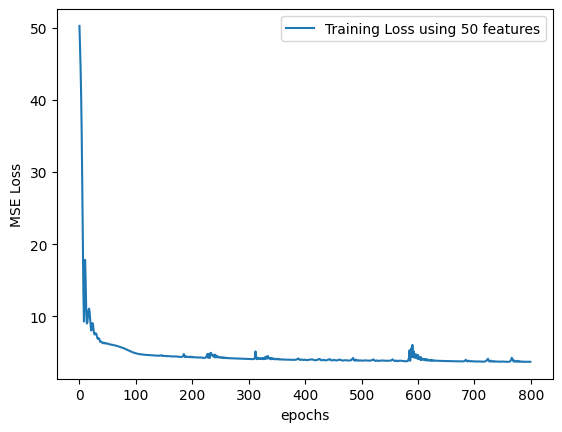

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('MSE Loss')
plt.xlabel('epochs')
plt.legend(['Training Loss using 50 features'])


###Testing the Model to evaluate its performance

In [ ]:
with torch.no_grad():
  output = model(x_test_50_features_tensor)  # Forward pass
  loss = criterion(output,y_test_tensor)  # Calculate the loss
  rmse_loss = torch.sqrt(loss)

print(f'RMSE:{rmse_loss:.8f}')

RMSE:1.90376675


/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([4091])) that is different to the input size (torch.Size([4091, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
for i in range(10):
  diff = np.abs(output[i].item() - y_test_tensor[i].item())
  print(f'PREDICTED: {output[i].item():8.2f}    TRUE: {y_test_tensor[i].item():8.2f} DIFF:{diff: 8.2f}')

PREDICTED:     7.39    TRUE:     5.00 DIFF:    2.39
PREDICTED:     6.96    TRUE:     6.00 DIFF:    0.96
PREDICTED:     7.16    TRUE:     9.00 DIFF:    1.84
PREDICTED:     5.97    TRUE:    10.00 DIFF:    4.03
PREDICTED:     6.18    TRUE:    10.00 DIFF:    3.82
PREDICTED:     6.35    TRUE:     6.00 DIFF:    0.35
PREDICTED:     6.37    TRUE:     3.50 DIFF:    2.87
PREDICTED:     7.47    TRUE:     6.50 DIFF:    0.97
PREDICTED:     7.89    TRUE:     7.00 DIFF:    0.89
PREDICTED:     6.77    TRUE:     7.50 DIFF:    0.73


In [ ]:
print(y_test_tensor.shape)
print(output.shape)

torch.Size([4091])
torch.Size([4091, 1])


###Creating Scatter plot between Predicted values and True values.

Text(0.5, 1.0, 'predicted vs True values using 50 features')

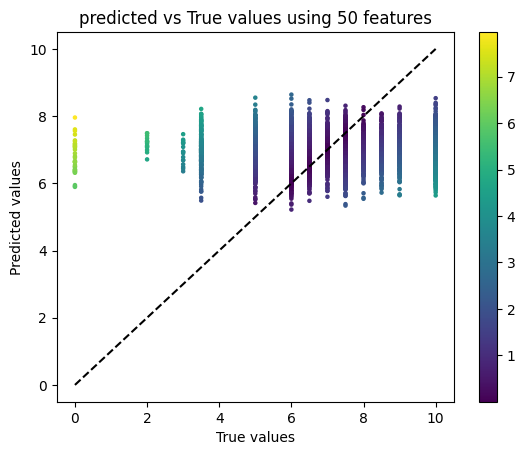

In [ ]:
output= output.squeeze()
abolute_diff = np.abs(output - y_test_tensor).reshape(-1)
plt.scatter(y_test_tensor.detach().numpy(), output.detach().numpy(),c=abolute_diff, cmap= 'viridis', s =5)
plt.colorbar()
plt.plot([0,10],[0,10], linestyle='--', color='k')    # Plot a diagonal line for reference
plt.xlabel("True values")
plt.ylabel('Predicted values')
plt.title('predicted vs True values using 50 features')

###Creating the density plot of actual and predicted values.

Text(0.5, 1.0, 'Density plot of actual and predicted values using 50 features')

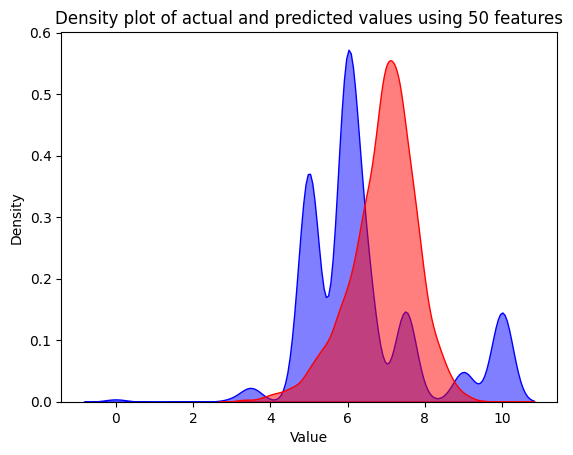

In [ ]:
import seaborn as sns
# Create a dataframe with the actual data and predictions
df = pd.DataFrame({'Actual': y_test_tensor.detach().numpy().flatten(),
                   'Predicted': output.detach().numpy().flatten()})

# Create a density plot of the actual data
sns.kdeplot(data=df, x='Actual', fill=True, alpha=0.5, color='blue', label='Actual')

# Create a density plot of the predicted data
sns.kdeplot(data=df, x='Predicted', fill=True, alpha=0.5, color='red', label='Predicted')

# Set the plot labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density plot of actual and predicted values using 50 features')


##Save the model after the training it.

In [ ]:
if len(losses) == epochs:
    torch.save(model.state_dict(), 'Project_Model_50_feature.pt')
else:
    print('Model has not been trained. Consider loading a trained model instead.')

In [ ]:
from sklearn.ensemble import StackingRegressor
stk = StackingRegressor([('cbr',CatBoostRegressor(verbose = False , eval_metric = 'R2',cat_features=cat_feature)),
                        ('lgbr',lgb.LGBMRegressor(n_estimators = 170))])
stk.fit(x_train,y_train)

preds_valid = stk.predict(x_test)

print('Training Score',r2_score(y_train,stk.predict(x_train)))
print()
print('Test Score',r2_score(y_test,stk.predict(x_test)))

Training Score 0.7678117279676954

Test Score 0.37514001412193243


In [ ]:
y = train_df['rating_num']
Y = pd.DataFrame(y)
Y.value_counts()

rating_num
6.0           3654
6.5           3247
7.5           3206
10.0          2442
5.0           2244
7.0           1248
3.5           1077
8.5           1062
9.0           1023
8.0            873
0.0            218
3.0            110
2.0             49
dtype: int64

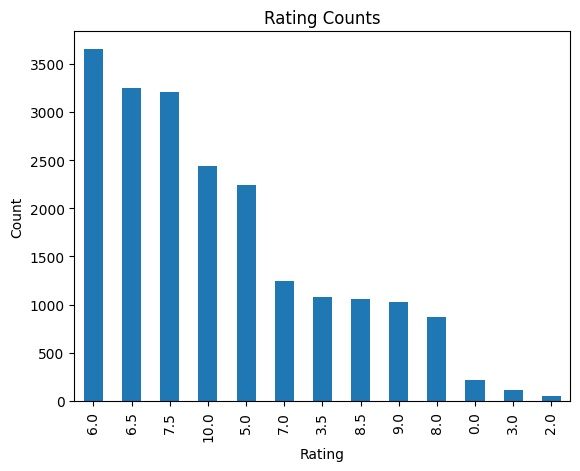

In [ ]:
rating_counts = Y['rating_num'].value_counts()
import matplotlib.pyplot as plt

# plot the value counts as a bar chart
rating_counts.plot(kind='bar')

# add a title and axis labels
plt.title('Rating Counts')
plt.xlabel('Rating')
plt.ylabel('Count')

# show the plot
plt.show()

In [ ]:
y

0        7.0
1        6.5
2        8.5
3        8.0
4        3.5
        ... 
20448    5.0
20449    6.0
20450    5.0
20451    6.0
20452    6.0
Name: rating_num, Length: 20453, dtype: float64

In [ ]:
# Assuming x and y are your dataframes
result_df = pd.concat([x, y], axis=1, join="outer")

# Print the resulting dataframe
result_df.head()

,scout_id,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,...,team2_offensive_derived_var_11,team2_offensive_derived_var_12,team2_offensive_derived_var_13,team2_offensive_derived_var_14,team2_defensive_derived_var_15,team2_offensive_derived_var_16,team2_defensive_derived_var_17,team2_offensive_derived_var_18,team2_offensive_derived_var_19,rating_num
0,13,2,0,8,7,7,0.317073,0.48,-5.199338,-5.199338,...,-1.252988,-1.292465,0.128317,-0.889766,0.347980,-1.607726,0.288962,-0.914679,-0.905189,7.0
1,16,1,1,8,3,9,0.463415,0.42,-5.199338,-5.199338,...,-0.277460,0.330873,0.165095,0.354296,0.468976,-1.054315,0.334962,-0.387089,-0.221344,6.5
2,4,1,0,5,11,11,0.682927,0.44,-5.199338,-5.199338,...,1.510124,-0.261988,-0.291367,1.247505,0.441749,1.654980,0.414288,1.292465,0.803958,8.5
3,13,1,1,4,17,17,0.682927,0.58,-5.199338,-5.199338,...,-0.754664,-0.328223,-0.447299,-0.679262,0.527733,-0.218773,0.423040,-0.755642,-0.734798,8.0
4,11,0,0,5,10,10,0.731707,0.70,-5.199338,-5.199338,...,0.293986,-0.922330,0.708752,1.215372,0.733625,0.514923,0.448360,0.260089,-0.094232,3.5


In [ ]:
cols= ['winner','team','competitionId', 'scout_id', 'player_weight', 'player_height',
       'player_general_var_4', 'team2_offensive_raw_var_77',
       'player_positional_raw_var_185', 'player_other_raw_var_197',
       'player_other_raw_var_38', 'player_other_raw_var_76',
       'player_general_derived_var_156', 'player_offensive_derived_var_89',
       'player_offensive_raw_var_31', 'player_positional_ratio_var_46',
       'team2_defensive_raw_var_17', 'player_other_raw_var_109',
       'player_physical_raw_var_194', 'team1_defensive_derived_var_17',
       'team1_defensive_derived_var_2', 'team1_other_raw_var_46',
       'player_other_ratio_var_9', 'player_other_ratio_var_74',
       'player_positional_derived_var_85', 'player_other_raw_var_64',
       'team1_other_ratio_var_15', 'player_other_derived_var_76',
       'team1_other_ratio_var_16', 'player_other_ratio_var_55',
       'team2_other_raw_var_93', 'team1_offensive_raw_var_1',
       'player_general_derived_var_146', 'player_other_derived_var_42',
       'player_positional_raw_var_110', 'player_general_raw_var_143',
       'player_other_ratio_var_42', 'player_defensive_derived_var_109',
       'team1_other_ratio_var_18', 'team2_other_raw_var_36',
       'team1_other_ratio_var_21', 'team1_other_ratio_var_20',
       'player_position_2', 'team1_other_ratio_var_0',
       'team1_defensive_raw_var_17', 'team1_other_raw_var_45',
       'player_other_raw_var_139', 'team2_offensive_derived_var_19',
       'team2_other_raw_var_49', 'team1_other_raw_var_47','rating_num']



new_df = result_df.loc[:, cols]

In [ ]:
drive.mount('/content/drive/')
path = "/content/drive/My Drive/ML_Data/new_df.csv"

with open(path, 'w', encoding = 'utf-8-sig') as f:
  new_df.to_csv(f)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
